Import Library

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Load Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Pisahkan Fitur & Label

In [5]:
X = df.drop('price_range', axis=1)
y = df['price_range']

Standardisasi Data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Membagi Data Train & Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
 X_scaled, y, test_size=0.2, random_state=42)


Membuat Model Neural Network

In [8]:
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dense(64, activation='relu'),
Dense(4, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

In [9]:
model.compile(
 optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)


Training Model

In [10]:
history = model.fit(
 X_train, y_train,
 epochs=20,
 validation_data=(X_test, y_test)
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3702 - loss: 1.3166 - val_accuracy: 0.6550 - val_loss: 0.9544
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.8498 - val_accuracy: 0.8475 - val_loss: 0.6121
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.5508 - val_accuracy: 0.8600 - val_loss: 0.4394
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.3772 - val_accuracy: 0.8975 - val_loss: 0.3359
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9514 - loss: 0.2739 - val_accuracy: 0.9175 - val_loss: 0.2690
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9606 - loss: 0.2032 - val_accuracy: 0.9225 - val_loss: 0.2311
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1723 - val_accuracy: 0.9225 - val_loss: 0.2127
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9851 - loss: 0.1329 - val_accuracy: 0.9250 - val_loss:

Evaluasi Model

In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Akurasi Model: {acc:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.1467 
Akurasi Model: 0.92


simpan model

In [12]:
model.save("mobile_price_model.h5")


Demo Prediksi

In [13]:
import numpy as np

# Contoh data HP baru (urutan HARUS sama dengan dataset)
sample_hp = np.array([[
    842,   # battery_power
    0,     # blue
    2.2,   # clock_speed
    1,     # dual_sim
    1,     # fc
    0,     # four_g
    8,     # int_memory
    7,     # m_dep
    188,   # mobile_wt
    2,     # n_cores
    20,    # pc
    756,   # px_height
    2540,  # px_width
    9,     # ram
    19,    # sc_h
    9,     # sc_w
    1,     # talk_time
    1,     # three_g
    1,     # touch_screen
    1      # wifi
]])

sample_hp_scaled = scaler.transform(sample_hp)
prediction = model.predict(sample_hp_scaled)
predicted_class = np.argmax(prediction)

print("Prediksi kelas harga:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediksi kelas harga: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Visualisasi Training

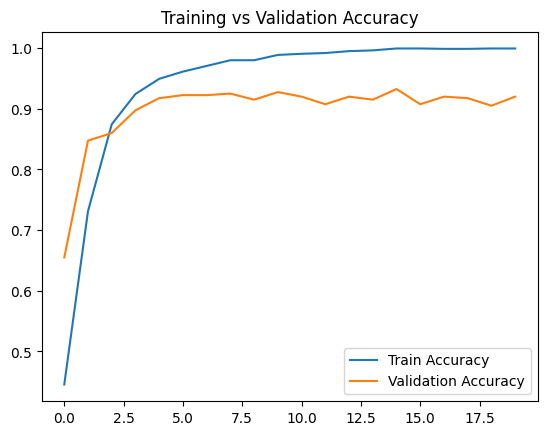

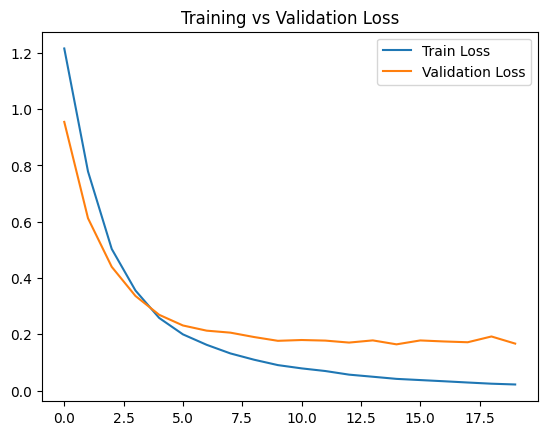

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


MODEL DENGAN DROPOUT

In [15]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),   # ⬅️ matikan 30% neuron

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')
])

model_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_dropout = model_dropout.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3452 - loss: 1.3581 - val_accuracy: 0.6175 - val_loss: 1.0553
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5460 - loss: 1.0588 - val_accuracy: 0.7575 - val_loss: 0.7464
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6586 - loss: 0.7795 - val_accuracy: 0.8375 - val_loss: 0.5565
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7014 - loss: 0.6594 - val_accuracy: 0.8750 - val_loss: 0.4467
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7598 - loss: 0.5553 - val_accuracy: 0.9025 - val_loss: 0.3797
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4766 - val_accuracy: 0.9225 - val_loss: 0.3176
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4185 - val_accuracy: 0.9425 - val_loss: 0.2718
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3833 - val_accuracy: 0.9375 - val_loss: 0.2505
Epo

EVALUASI & PERBANDINGAN HASIL

In [17]:
loss_base, acc_base = model.evaluate(X_test, y_test)
loss_drop, acc_drop = model_dropout.evaluate(X_test, y_test)

print(f"Baseline Accuracy  : {acc_base:.4f}")
print(f"Dropout Accuracy   : {acc_drop:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9265 - loss: 0.1467
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1303 
Baseline Accuracy  : 0.9200
Dropout Accuracy   : 0.9475


save model_dropout

In [18]:
model_dropout.save("final_mobile_price_model.h5")

confusion matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


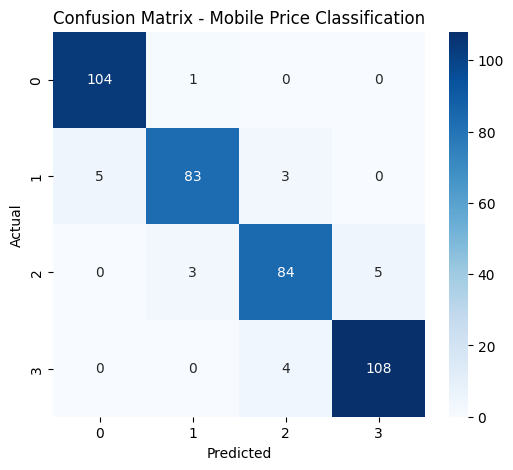

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       105
           1       0.95      0.91      0.93        91
           2       0.92      0.91      0.92        92
           3       0.96      0.96      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.95      0.95      0.95       400



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas
y_pred = np.argmax(model_dropout.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mobile Price Classification")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


EarlyStopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_es = model_dropout.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9305 - loss: 0.1700 - val_accuracy: 0.9325 - val_loss: 0.1621
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9219 - loss: 0.1802 - val_accuracy: 0.9350 - val_loss: 0.1583
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9247 - loss: 0.1848 - val_accuracy: 0.9450 - val_loss: 0.1413
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9278 - loss: 0.1747 - val_accuracy: 0.9500 - val_loss: 0.1417
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.1346 - val_accuracy: 0.9425 - val_loss: 0.1442
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9559 - loss: 0.1180 - val_accuracy: 0.9375 - val_loss: 0.1513


## Kesimpulan

Model Deep Learning dengan arsitektur Sequential dan teknik Dropout berhasil meningkatkan performa klasifikasi harga smartphone. Model akhir mencapai akurasi 95% pada data uji dan menunjukkan generalisasi yang baik berdasarkan Confusion Matrix dan Classification Report.
